# Base Dataset 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# 1. Explore Base Dataset

1. **信用风险评分（credit_risk_score）**：
   - **理由**：信用风险评分是银行用来评估申请人信用风险的重要指标，直接反映了申请人的信用情况，这与欺诈行为有很大关联。

2. **收入（income）**：
   - **理由**：收入水平可以帮助识别申请人的经济状况，高收入可能意味着较低的欺诈风险，而异常高或异常低的收入可能提示潜在的欺诈风险。

3. **姓名邮箱相似度（name_email_similarity）**：
   - **理由**：名字和邮箱的相似度可以揭示申请人提供的信息是否一致，低相似度可能提示使用假信息进行欺诈。

4. **申请日期（days_since_request）**：
   - **理由**：申请日期可以揭示短时间内大量申请的情况，这可能是欺诈行为的一个重要指标。

5. **邮政编码4周内计数（zip_count_4w）**：
   - **理由**：同一邮政编码内短时间内大量申请可能提示某个地区的集中欺诈行为。

6. **设备欺诈计数（device_fraud_count）**：
   - **理由**：使用同一设备的欺诈申请数量是一个直接的欺诈指示器，历史上的欺诈记录是预测未来欺诈的强指标。

7. **电话有效性（phone_home_valid, phone_mobile_valid）**：
   - **理由**：电话的有效性可以帮助识别申请人的真实性，虚假或无效的电话号码可能提示欺诈行为。

8. **预期余额金额（intended_balcon_amount）**：
   - **理由**：预期余额金额的异常值可能提示欺诈行为，例如非常高的初始转账金额。

9. **住房状态（housing_status）**：
   - **理由**：住房状态反映了申请人的稳定性，较稳定的住房状态可能意味着较低的欺诈风险。


In [54]:
base = pd.read_csv('datasets/Base_cleaned.csv') #Base_cleaned.csv是将device_fraud_count列（全部为0）删除后的数据集
base

# 由于原数据income=0.6或0.7并不精确，实际上有小数点后数位的偏移，需要截取到一位小数
# # 截取到一位小数
# base['income'] = base['income'].apply(lambda x: round(x, 1))
# 
# # 查看截取后的唯一值
# unique_incomes = base['income'].unique()
# print(unique_incomes)

# base.to_csv('datasets/Base_cleaned.csv', index=False)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,31,0,1500.0,0,INTERNET,16.967770,other,0,1,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,31,0,200.0,0,INTERNET,16.068595,other,0,1,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,1,0,200.0,0,INTERNET,1.378683,linux,1,1,7


In [55]:
base.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370554,NaN,...,NaN,NaN,NaN,NaN,992952,NaN,342728,NaN,NaN,NaN
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,NaN,1572.692049,...,10.839303,0.222988,515.851010,0.025242,NaN,7.544940,NaN,0.576947,1.018312,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,NaN,1005.374565,...,12.116875,0.416251,487.559902,0.156859,NaN,8.033106,NaN,0.494044,0.180761,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,NaN,1.000000,...,-1.000000,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,NaN,894.000000,...,-1.000000,0.000000,200.000000,0.000000,NaN,3.103053,NaN,0.000000,1.000000,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,NaN,1263.000000,...,5.000000,0.000000,200.000000,0.000000,NaN,5.114321,NaN,1.000000,1.000000,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,NaN,1944.000000,...,25.000000,0.000000,500.000000,0.000000,NaN,8.866131,NaN,1.000000,1.000000,5.000000


In [56]:
base['device_fraud_count'].value_counts()
# drop the column device_fraud_count
# base.drop(columns=['device_fraud_count'], inplace=True)
# base.to_csv('datasets/Base_cleaned.csv', index=False)

KeyError: 'device_fraud_count'

#### device_fraud_count
我们发现该特征所有的值都是0，这意味着该特征对于欺诈预测是没有用的，我们可以将其删除。

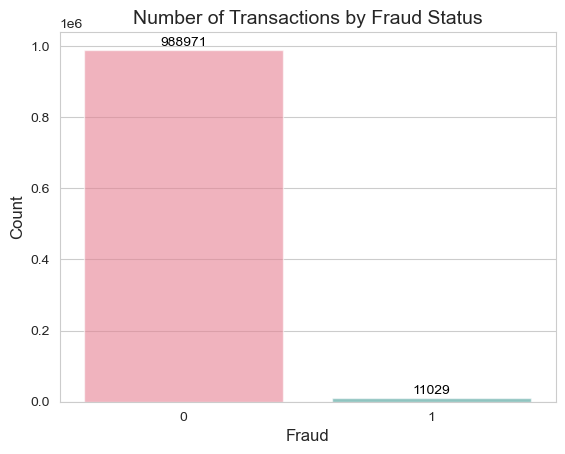

In [57]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)

sns.set_style("whitegrid")

# Plot the fraud_bool distribution
ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Add data labels
for p in ax.patches:
    height = int(p.get_height())  # Convert to integer
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display plot
plt.show()

## 1.1 Missing values
Missing values are represented by -1 or negative values in the dataset. Let's replace them with NaN values.

As the description says, there are only 6 numeric columns with missing values:

1. **prev_address_months_count**: -1 indicates a missing value.
2. **Current Address Months Count (numeric value) current_address_months_count**: -1 indicates a missing value.
3. **Expected Balance Amount (numeric value) introduced_balcon_amount**: a negative value indicates a missing value.
4. **Session length (numeric value) session_length_in_minutes**: -1 indicates a missing value.
5. **Bank account months (numeric value) bank_months_count**: -1 indicates a missing value.
6. **device_unique_emails_count (numeric value) device_distinct_emails**: -1 indicates a missing value.


In [58]:
# check for missing values（-1 or negative values）

df=base.copy()

# select the columns with missing values
missing_cols = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'session_length_in_minutes', 'bank_months_count', 'device_distinct_emails_8w']
# replace -1 or negative values with NaN
df[missing_cols] = df[missing_cols].replace(-1, np.nan)
df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)

C:\Users\yhb\AppData\Local\Temp\ipykernel_18072\3637865308.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)


In [59]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

C:\Users\yhb\AppData\Local\Temp\ipykernel_18072\3014923808.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


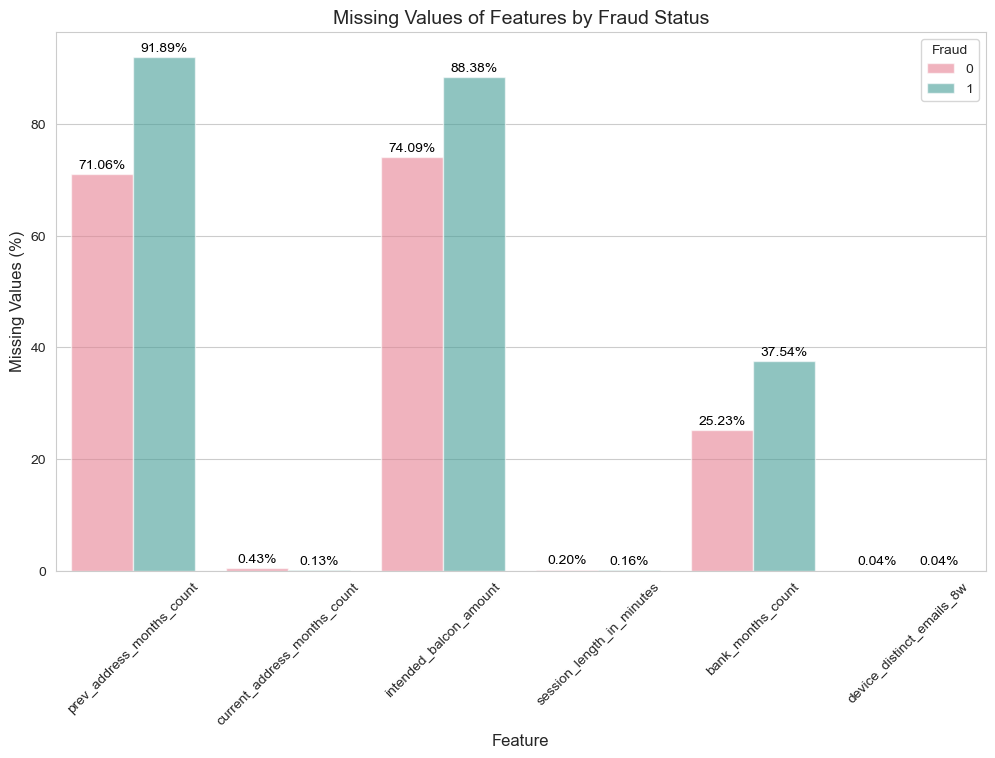

In [60]:
# 创建存放缺失值百分比的 DataFrame
missing_vals = pd.DataFrame()

# 计算每个特征在不同欺诈状态下的缺失值百分比
for feature in missing_cols:
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum() / len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

# 转置并重塑数据框架以适合绘图
missing_vals = pd.DataFrame(missing_vals.T.stack()).reset_index()
missing_vals.columns = ['feature', 'fraud_bool', 'missing_vals']

# 将 fraud_bool 列转换为字符串类型
missing_vals['fraud_bool'] = missing_vals['fraud_bool'].astype(str)

# 设置绘图
plt.figure(figsize=(12, 7))

# 创建柱状图
ax = sns.barplot(data=missing_vals, x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6)

# 在每个柱状图上添加数值标注
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height + 0.5,
        f'{height:.2f}%', ha='center', va='bottom', fontsize=10, color='black'
    )

# 自定义标签和图例
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Missing Values (%)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_title("Missing Values of Features by Fraud Status", fontsize=14)
ax.legend(title="Fraud", fontsize=10)

# 显示图表
plt.show()

## 1.2 Deal with Missing Values
- As the missing values in col[prev_address_months_count] and col[intended_balcon_amount] are too many, we can drop the 2 cols.
- For the [bank_months_count], about 25% of the values are missing, we can fill the missing values.
    - 选择使用该列最多的情况（1）进行填充，这样处理可以保持数据的一致性，并避免引入过多的偏差。
- For the rest of the cols(3 cols), the missing values are less than 1%, we can drop the rows with missing values.

In [61]:
# drop the columns with too many missing values
df.drop(columns=['prev_address_months_count', 'intended_balcon_amount'], inplace=True)

# fill the missing values in bank_months_count with the median value
df['bank_months_count'].fillna(1, inplace=True)

# drop the rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                           0
keep_alive_s

## 1.3 Numeric Features Analysis
一共三种特征：数值型，二进制，类别型

类别型有5个变量：付款类型（分类）payment_type，就业状态（分类）employment_status，住房状态（分类）housing_status，来源（分类）source，设备操作系统（分类）device_os

二进制7个：binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

数值型13个(unique>=10）,有两个缺失值过多，之后建模的时候可以考虑删除。

'customer_age', 'device_distinct_emails_8w', 'income', 'month'数据类型为numeric但是unique<10，可以认为是一种类别型特征。但是并未归类到cate_features中。

In [13]:
# 筛选出二进制特征
binary_features_name = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

binary_features = df[binary_features_name]

# 列出所有的数值型特征
# numeric_features_name = df.select_dtypes(include=['number']).columns.tolist()
# 去掉二进制特征
# numeric_features_name = [col for col in numeric_features_name if col not in binary_features_name]

numeric_features_name=[x for x in df.columns if df[x].nunique() >= 10]

numeric_features = df[numeric_features_name]

# 筛选出类别型特征
cate_features_name = df.select_dtypes(include=['object']).columns.tolist()
cate_features = df[cate_features_name]

### 1.3.1 Numeric 
### 所有数值型密度分布（分别标注欺诈和非欺诈）
此时使用原始base数据（未经过缺失值处理）

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

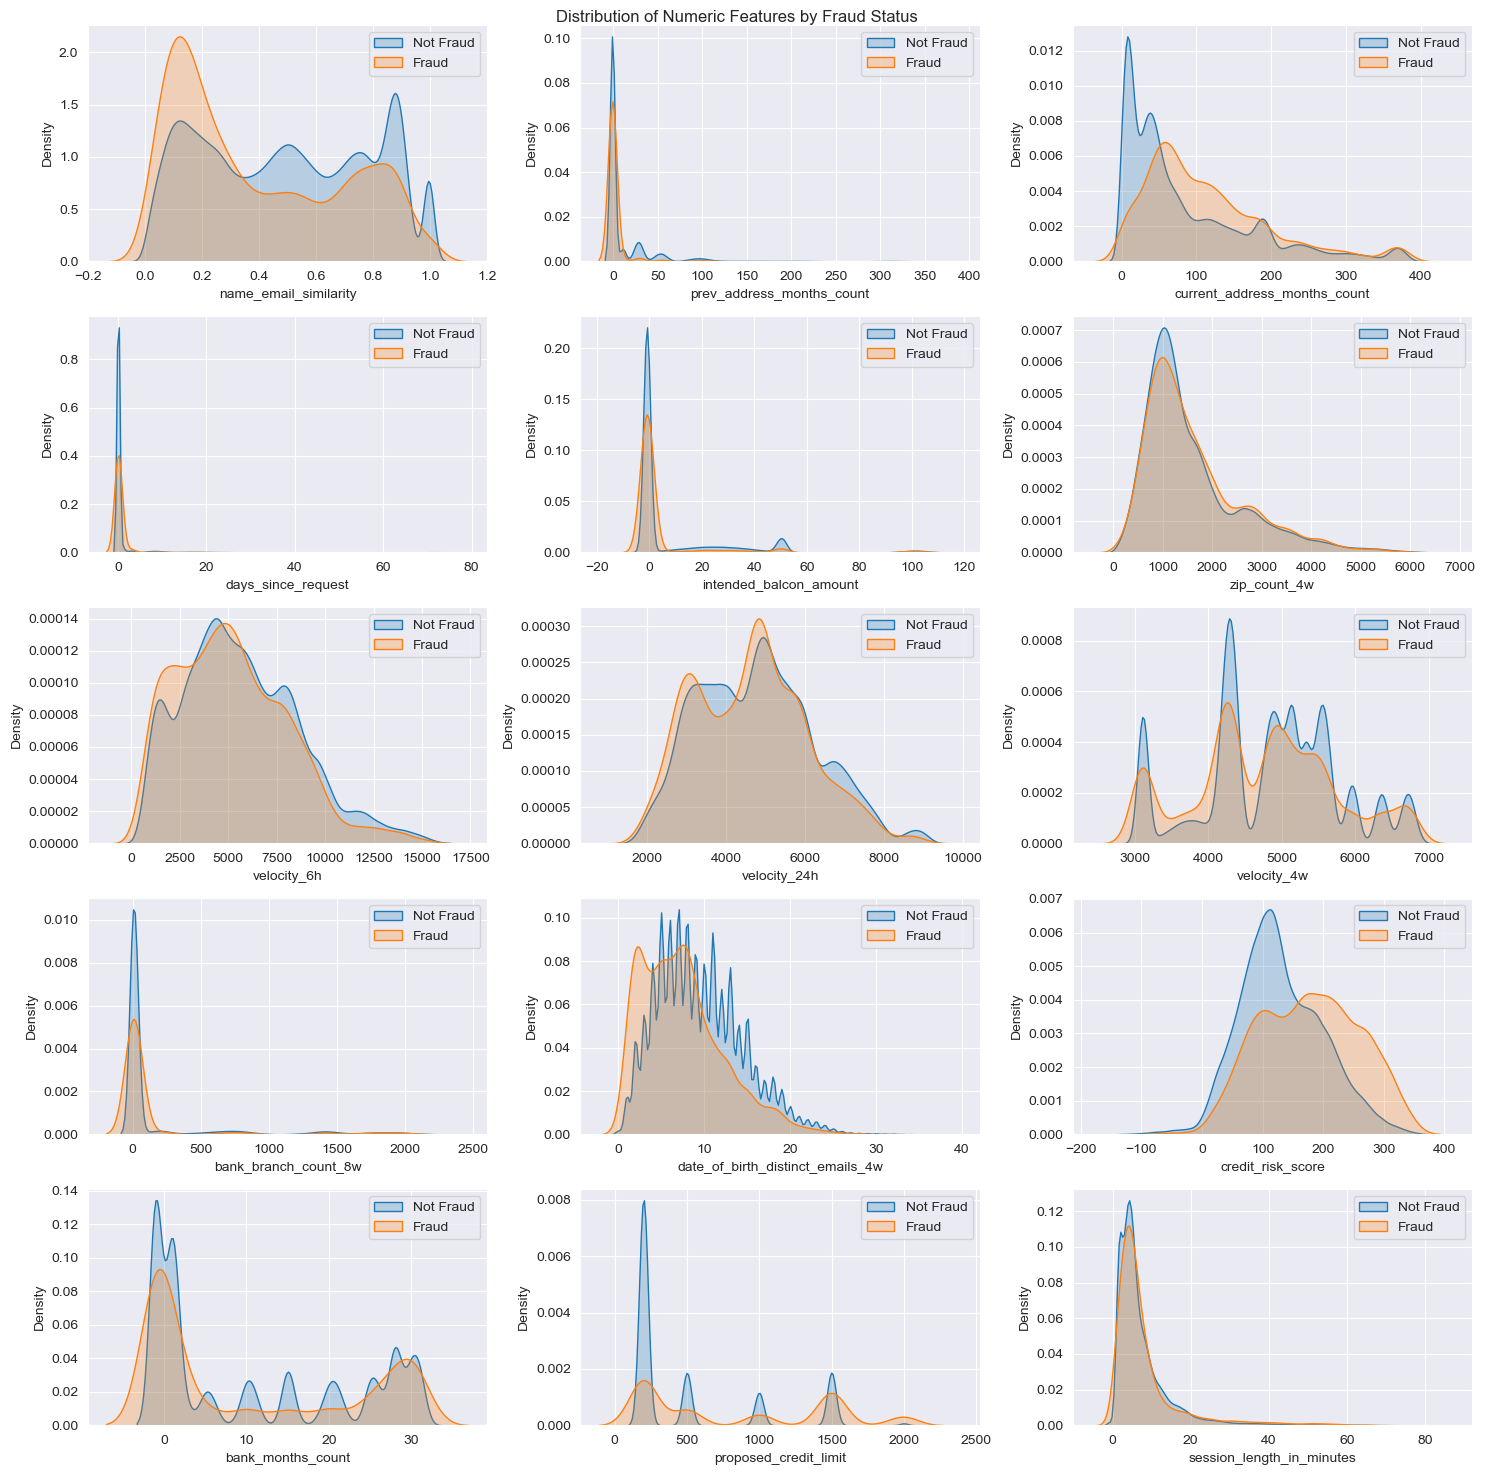

In [179]:
numeric_features_name=[x for x in base.columns if base[x].nunique() >= 10]


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features_name):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=base[base['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=base[base['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

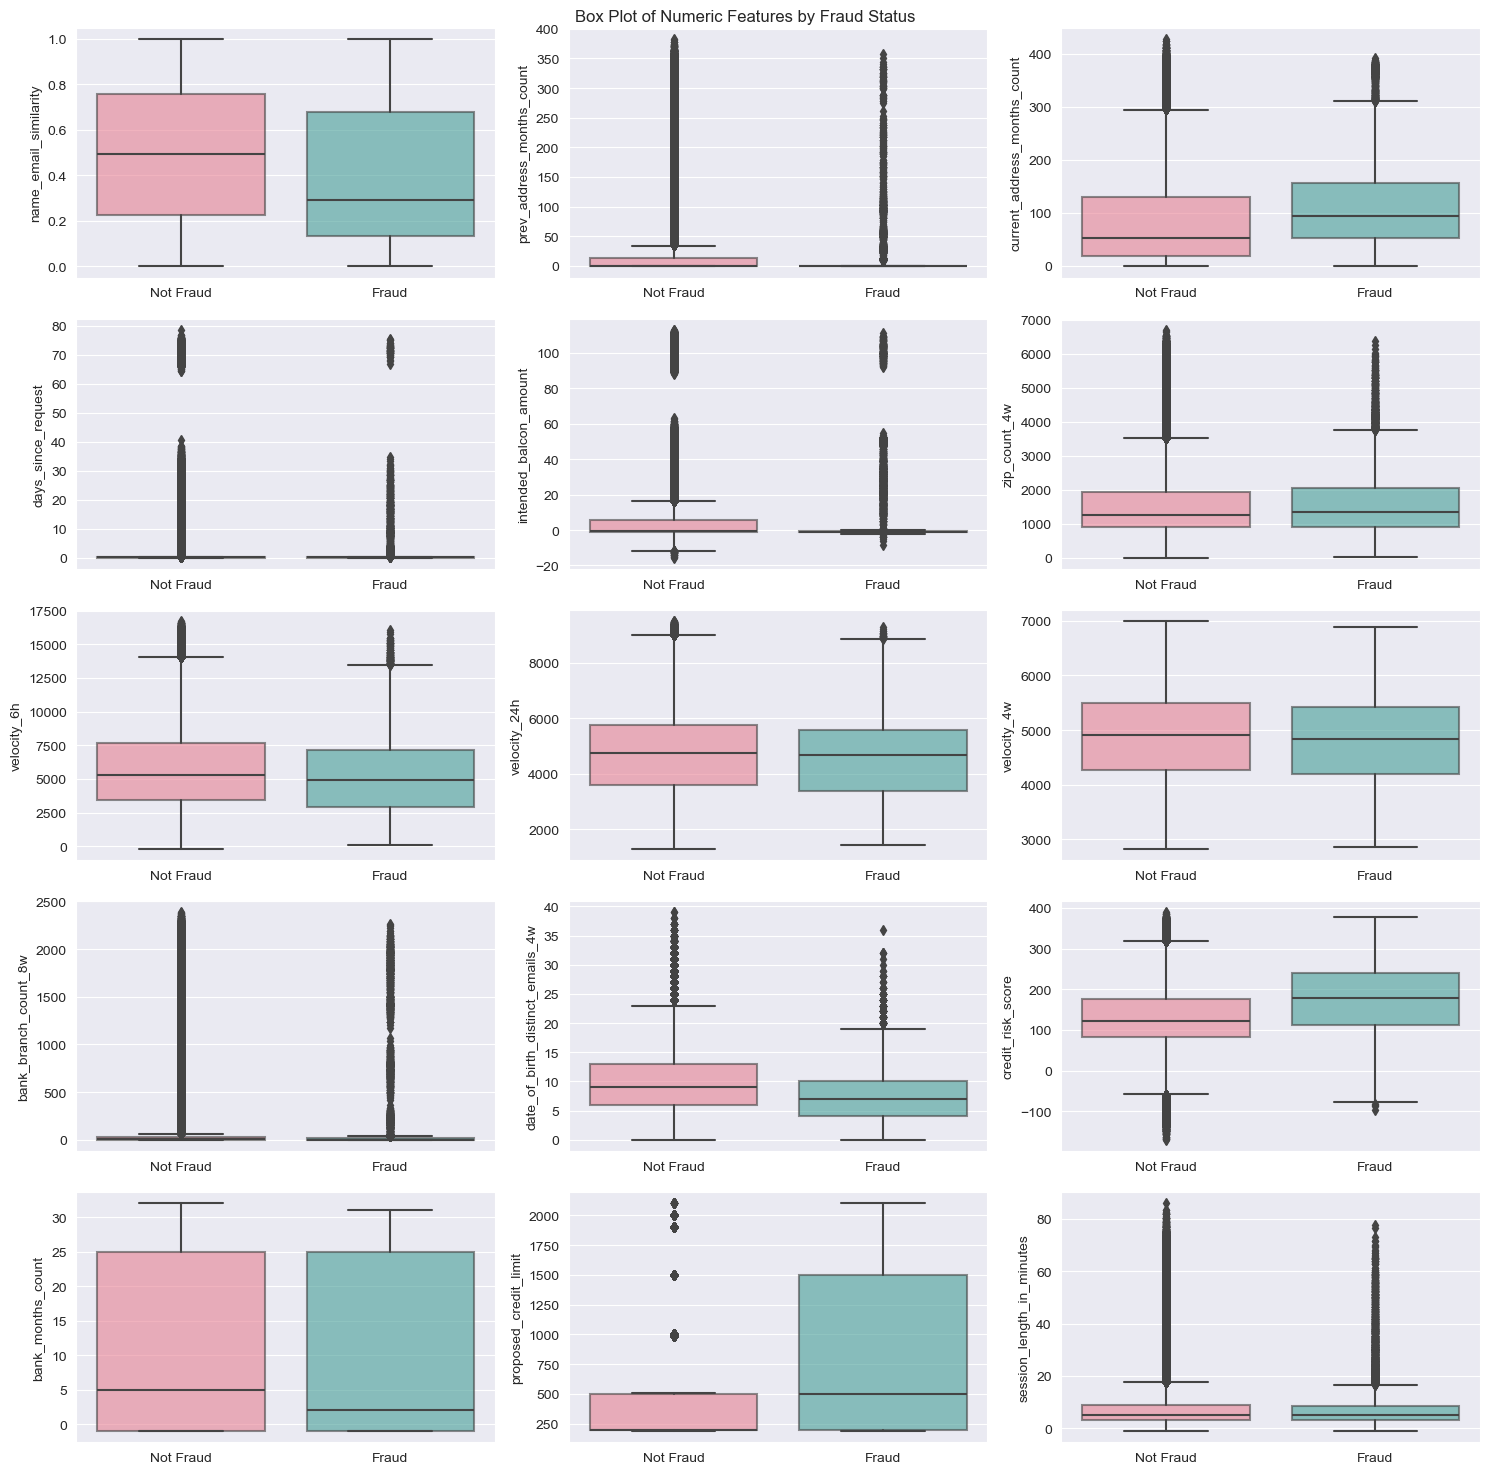

In [182]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features_name):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=base, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Outliers
在不平衡数据中进行异常值处理可能会带来一些挑战，比如异常值可能包含有价值的信息或代表了少数类别的罕见实例，若直接剔除异常值容易导致信息丢失，类分别失真，偏离真实世界数据分布等问题。考虑对模型性能的潜在影响，暂时不对该数据集的异常值进行处理。未来可以尝试探索能保持不平衡数据完整性的替代方法，例如专为不平衡数据集设计的稳健建模技术或异常值检测方法。

Outlier processing in unbalanced data may pose some challenges, such as outliers may contain valuable information or represent rare instances of a few classes, which if directly eliminated can easily lead to problems such as loss of information, distortion of class separation, and deviation from real-world data distribution. Considering the potential impact on model performance, the outliers in this dataset are not processed for the time being. In the future, attempts can be made to explore alternative methods that can maintain the integrity of unbalanced data, such as robust modelling techniques designed for unbalanced datasets or outlier detection methods.


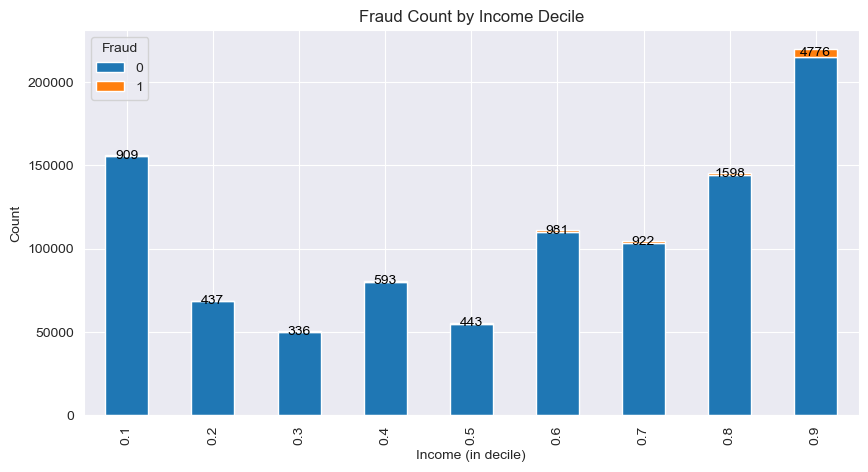

In [175]:
# Income with Fraud-bool

# 确保数据类型正确
df['income'] = df['income'].astype(str)
df['fraud_bool'] = df['fraud_bool'].astype(int)

# 分组统计每个income对应的fraud_bool计数
grouped = df.groupby(['income', 'fraud_bool']).size().unstack(fill_value=0)

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(10, 5))
grouped.plot(kind='bar', stacked=True, ax=ax)

# 美化图表
ax.set_title('Fraud Count by Income Decile')
ax.set_xlabel('Income (in decile)')
ax.set_ylabel('Count')
ax.legend(title='Fraud', loc='upper left')

# 在每个柱上标注出该income对应的欺诈数
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    # 检查是否为欺诈柱子
    if p.get_facecolor() == ax.get_legend().get_patches()[1].get_facecolor():
        if height > 0:  # 只标注高度大于0的柱子
            ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', fontsize=10, color='black')

plt.show()

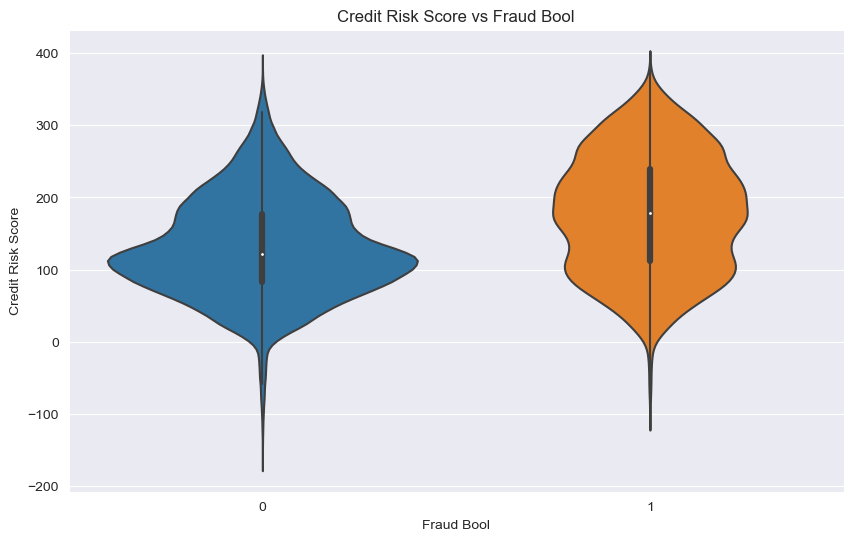

In [176]:
# 对credit_risk_score进行小提琴图可视化
plt.figure(figsize=(10, 6))
sns.violinplot(x='fraud_bool', y='credit_risk_score', data=df)
plt.title('Credit Risk Score vs Fraud Bool')
plt.xlabel('Fraud Bool')
plt.ylabel('Credit Risk Score')
plt.show()


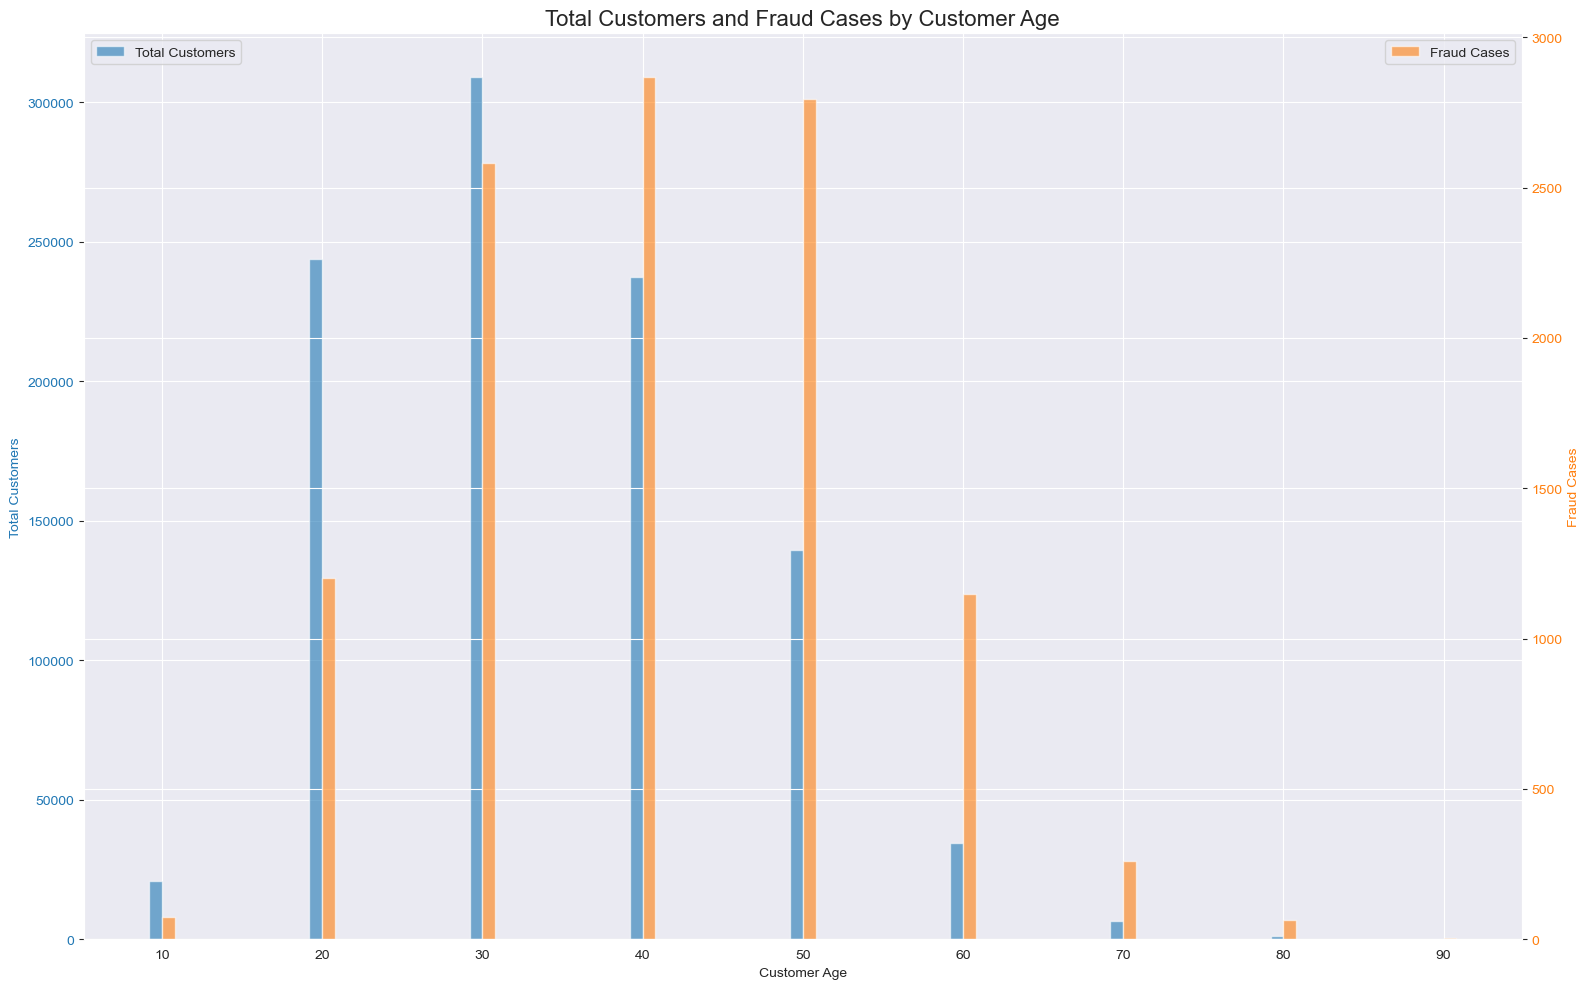

In [103]:
age_counts = df['customer_age'].value_counts().sort_index()
fraud_counts = df[df['fraud_bool'] == 1]['customer_age'].value_counts().sort_index()

# Ensure all ages in age_counts are in fraud_counts (and vice versa) by reindexing
fraud_counts = fraud_counts.reindex(age_counts.index, fill_value=0)

# Create the dual-axis bar plot with non-stacked bars and enhanced colors
fig, ax1 = plt.subplots(figsize=(16, 10))
bar_width = 0.8

# Bar plot for total number of customers by age with enhanced color
ax1.bar(age_counts.index - bar_width/2, age_counts.values, bar_width, color='#1f77b4', alpha=0.6, label='Total Customers')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Total Count', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Bar plot for number of fraud cases by age with enhanced color
ax2 = ax1.twinx()
ax2.bar(fraud_counts.index + bar_width/2, fraud_counts.values, bar_width, color='#ff7f0e', alpha=0.6, label='Fraud Cases')
ax2.set_ylabel('Fraud Cases', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Adding a title and legend with enhanced colors
plt.title('Total Customers and Fraud Cases by Customer Age', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [118]:
# 将fraud count和age count转换为dataframe
age_fraud = pd.DataFrame({'age': age_counts.index, 'total': age_counts.values, 'fraud': fraud_counts.values})
# 计算不同年龄的欺诈率
age_fraud['fraud_rate'] = age_fraud['fraud'] / age_fraud['total']

# age_fraud

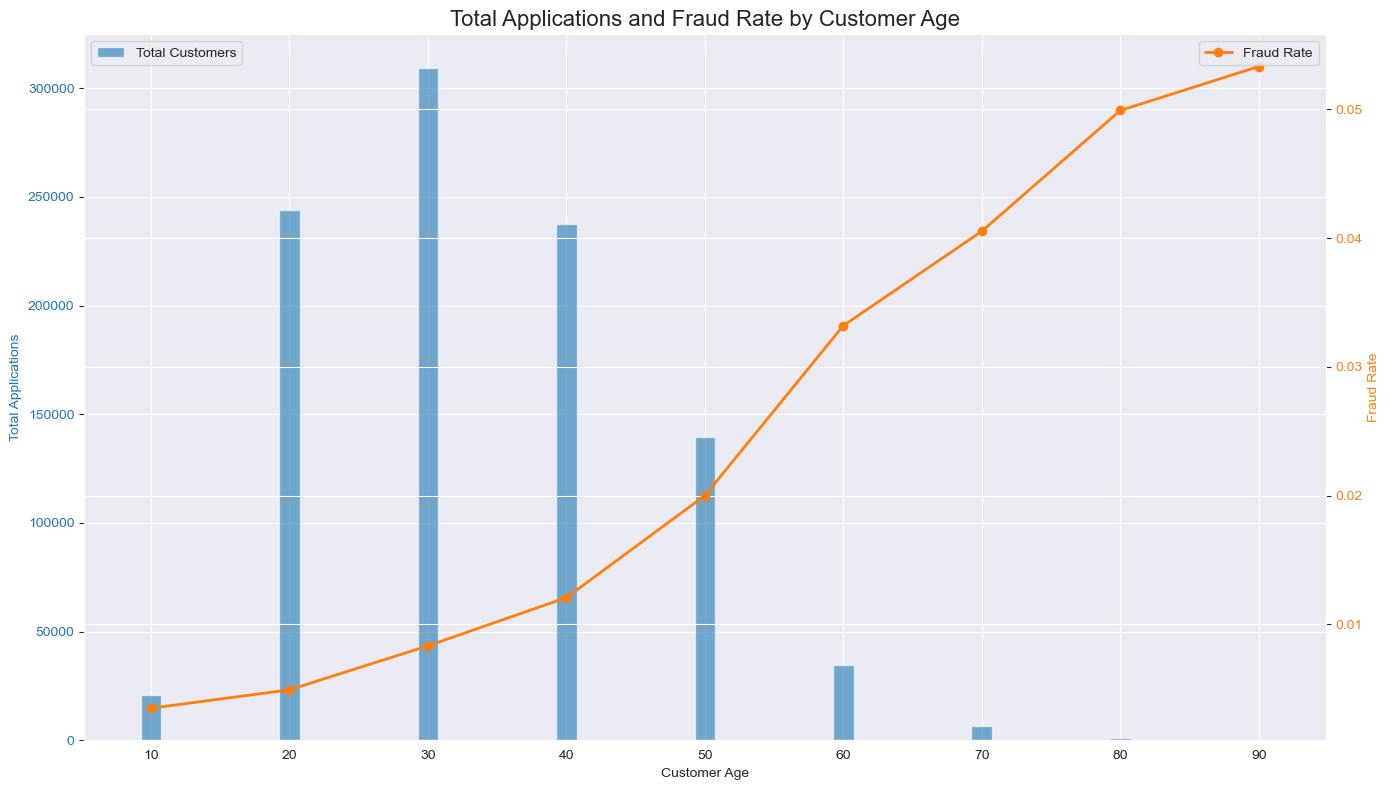

In [177]:
# Create a visualization showing the distribution of total customers and fraud rate by age

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 1.5

# Bar plot for total number of customers by age
ax1.bar(age_fraud['age'], age_fraud['total'], bar_width, color='#1f77b4', alpha=0.6, label='Total Customers')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Total Applications', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Line plot for fraud rate by age
ax2 = ax1.twinx()
ax2.plot(age_fraud['age'], age_fraud['fraud_rate'], color='#ff7f0e', marker='o', linewidth=2, label='Fraud Rate')
ax2.set_ylabel('Fraud Rate', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Adding a title and legend
plt.title('Total Applications and Fraud Rate by Customer Age', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


#### insights
- income: 从堆叠柱状图可以看到，income在0.8和0.9时，欺诈数显著高于其余income值，其中income=0.9的申请人中有4000+的欺诈样本，占全部欺诈数的40%.
- credit_risk_score: 从小提琴图可以看到，非欺诈的数据分布更显著集中于credit_risk_score=100左右的部分，而欺诈样本则再200附近较为集中，且在更高的credit_risk_score值上有更多分布。
- customer_age: 从双轴柱状图可以看到，大部分申请人分布在20-40岁之间，欺诈样本则主要出现在age=30-59.根据数据集的prevalence特性，若按50岁为分界，即当age<=49为majority，其余为minority，则base数据集应该在minority中有大概两倍于majority的欺诈率。并且可以看到，随着age上升，fraud rate也在不断上升。

### 1.3.2 Categorical Features
`visualize_cate_feature`函数用于可视化类别特征的分布和欺诈率。会产生两个图，第一个图展示了类别特征的分布，第二个图展示了类别特征的欺诈率（该特征中每个类别的欺诈率）。


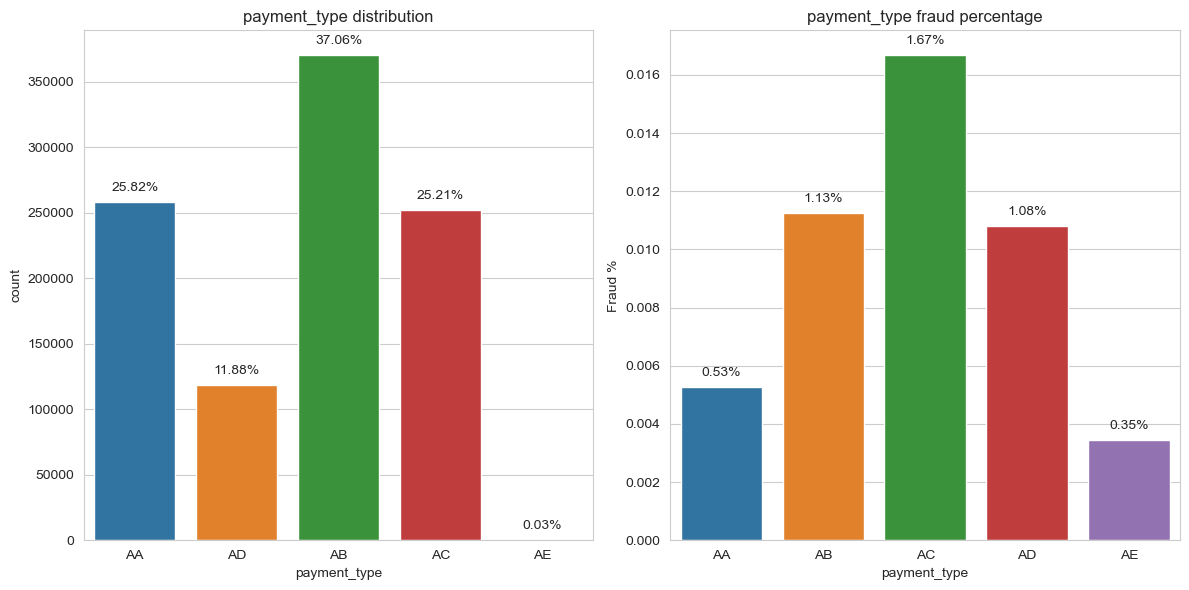

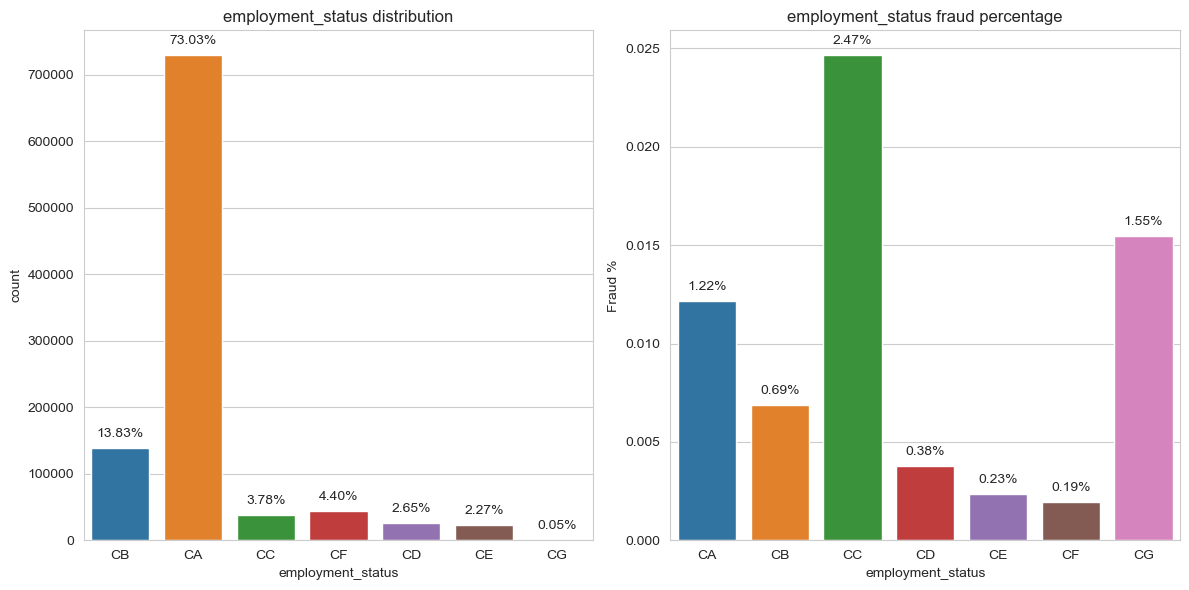

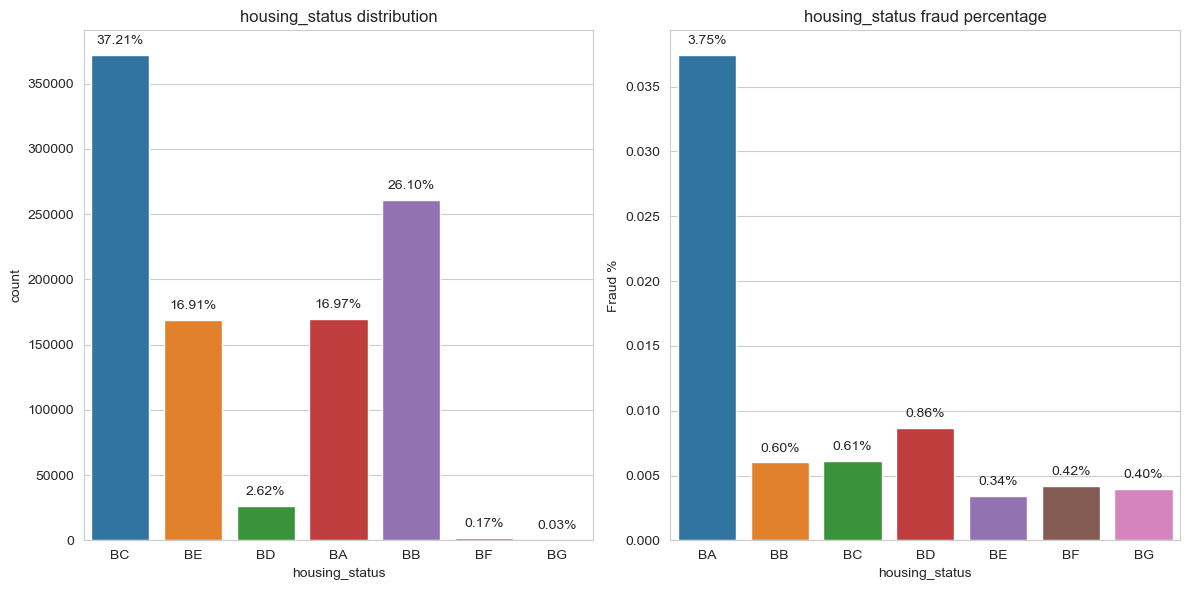

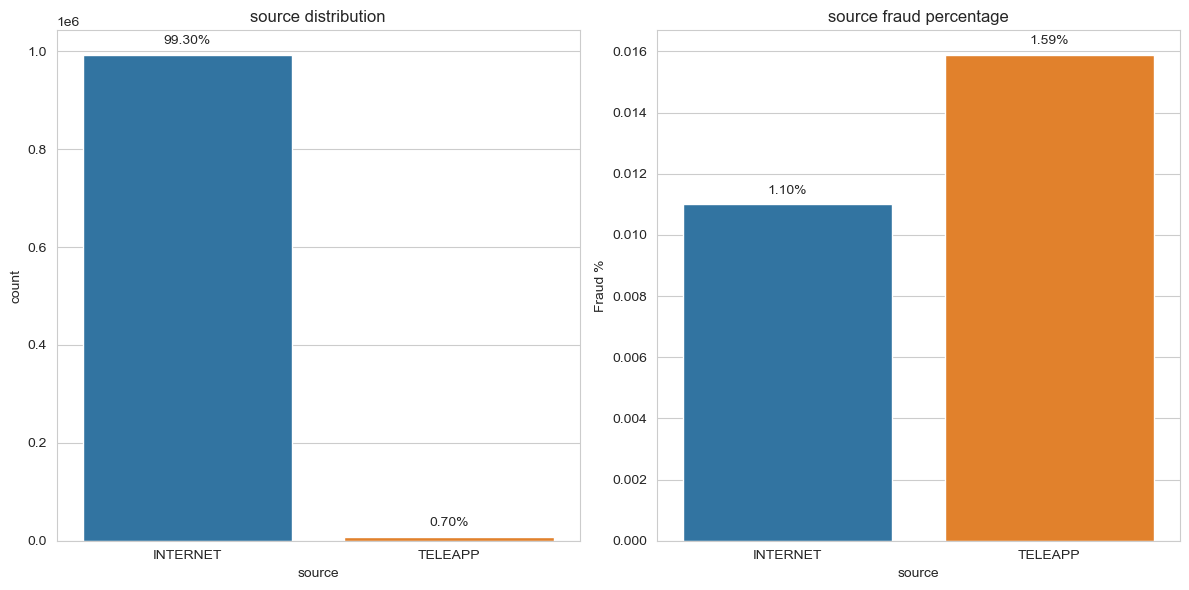

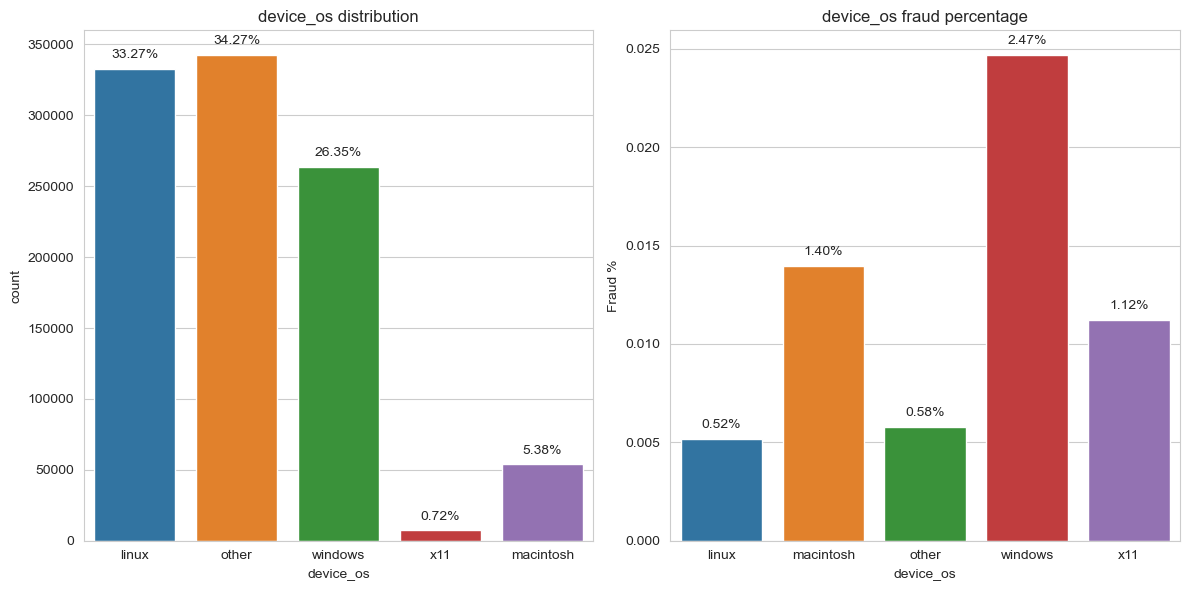

In [52]:
def visualize_cate_feature(data, *features):
    for feature in features:
        # Plot category distribution
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        ax1 = sns.countplot(data=data, x=feature)
        total = len(data)
        for p in ax1.patches:
            height = p.get_height()
            ax1.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.title(f'{feature} distribution')
        plt.ylabel('count')
        
        # Plot fraud percentage
        plt.subplot(1, 2, 2)
        fraud_data = data.groupby(feature)['fraud_bool'].mean().reset_index()
        ax2 = sns.barplot(data=fraud_data, x=feature, y='fraud_bool')
        for p in ax2.patches:
            height = p.get_height()
            ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.title(f'{feature} fraud percentage')
        plt.ylabel('Fraud %')
        
        plt.tight_layout()
        plt.show()

# Example usage with one feature
visualize_cate_feature(df, 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os')


# 2. Feature Engineering
## 2.1 One-Hot Coding for Categorical Features

- Label Encoding: 如果分类变量是有序的（如低、中、高），可以使用标签编码（Label Encoding），将每个类别映射到一个唯一的整数值。
- One-Hot Encoding: 对于无序的分类变量（如国家、城市、付款类型等），One-Hot Encoding 是常用的方法。它将每个类别转换为一个二进制列。
- 

### 2.1.1 Multi-collinearity多重共线性
多重共线性（Multicollinearity）是指在回归分析中，两个或多个自变量高度相关，从而导致回归系数的不稳定性和解释困难。具体表现为当自变量之间存在高度线性相关时，回归模型的参数估计可能变得非常不准确，标准误差变大，模型解释能力减弱。

多重共线性的原因和影响
原因：自变量之间的高度相关性。
在One-Hot Encoding过程中，如果所有类别都被编码成新的特征列（没有丢弃任何一个），这些列中有一些会线性相关。

影响：
- 回归系数变得不稳定，可能会因为样本的微小变化而发生很大改变。
- 标准误差变大，影响变量的显著性检验。
- 回归模型的解释性和预测能力下降。

One-Hot Encoding 和多重共线性
在 One-Hot Encoding 中，假设有一个包含 n 个不同类别的分类变量。对这个变量进行 One-Hot Encoding 会生成 n 个新的二进制特征列。如果保留所有这些特征列，会引入多重共线性的问题。因为这 n个特征列之和等于 1（每一行恰好属于其中一个类别）。

使用 get_dummies 函数时，可以通过设置 drop_first=True 来避免多重共线性问题。这样会删除第一个类别，从而避免引入不必要的特征并且保留了所有信息。

---
### 2.1.2. 多重共线性对模型的影响
一般而言，多重共线性会导致线性模型（如线性回归、逻辑回归等）的系数估计不准确，标准误差变大，模型的解释性和预测能力下降。

而对于树模型和神经网络模型，多重共线性的影响较小，因为这些模型不依赖于特征之间的线性关系。但是使用`drop_first=True`可以减少特征数量，提高模型训练效率。

In [101]:
def preprocess_categorical_data(data):
    # 需要进行One-Hot Encoding的分类变量
    categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    # 使用pd.get_dummies进行One-Hot Encoding
    # drop_first=True表示删除第一个类别，避免多重共线性,同时避免引入不必要的特征并且保留了所有信息
    data_encoded = pd.get_dummies(data, columns=categorical_features,drop_first=True)
    
    # 找出新生成的 One-Hot 编码列
    encoded_columns = data_encoded.columns.difference(data.columns)
    
    # 将 One-Hot 编码列转换为整数类型
    data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)
    
    return data_encoded

# 示例预处理
processed_data = preprocess_categorical_data(df)
processed_data.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,...,1,0,0,0,0,0,0,0,0,0
1,0,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,...,1,0,0,0,0,0,0,1,0,0
2,0,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,...,1,0,0,0,0,0,0,0,1,0
3,0,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,...,1,0,0,0,0,0,0,0,0,0
4,0,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,...,1,0,0,0,0,0,0,1,0,0


## 2.2 Feature Scaling---MinMaxScaler

只对连续型（numeric）特征进行缩放，因为二进制特征和类别型特征不需要缩放。

In [102]:
# train test split
X = processed_data.drop(columns='fraud_bool')
y = processed_data['fraud_bool']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [106]:
# 创建 MinMaxScaler 实例
numeric_transformer = MinMaxScaler()

# 创建 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', numeric_transformer, numeric_features_name)
    ],
    remainder='passthrough'
)

# 在训练集上拟合并转换
x_train_scaled = preprocessor.fit_transform(x_train)

# 仅转换测试集
x_test_scaled = preprocessor.transform(x_test)

# 转换后的结果通常为 NumPy 数组，你可以将其转换回 DataFrame 以便于进一步处理
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### 2.3 Feature Selection